In [1]:
#EDA (Exploratory data analysis)

In [1]:
import pandas as pd

In [2]:
import ipywidgets as widgets

In [3]:
from pysentimiento.preprocessing import preprocess_tweet

2024-03-17 01:35:18.176238: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-17 01:35:18.176309: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-17 01:35:18.208615: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-17 01:35:18.278111: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-17 01:35:19.160946: W tensorflow/compiler/tf2

In [5]:
#Helper Functions

In [4]:
# label to name
def label2name(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    if x == 2:
        return "Positive"

In [7]:
#Read Data

In [5]:
# merging two csv files 
df = pd.concat( 
    map(pd.read_csv, ['data/raw_dataset-01.csv', 'data/raw_dataset-02.csv', 'data/raw_dataset-03.csv', 'data/raw_dataset-04.csv']), ignore_index=True) 
# print(df) 

# df = pd.read_csv(r'data/raw_dataset-01.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11276 entries, 0 to 11275
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11276 non-null  object
 1   label   11276 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.3+ KB


In [8]:
import re
from typing import Union, List
import string

class CleanText():
    """ clearing text except digits () . , word character """ 

    def __init__(self, clean_pattern = r"[^A-ZĞÜŞİÖÇIa-zğüı'şöç0-9.\"',()]"):
        self.clean_pattern =clean_pattern

    def __call__(self, text: Union[str, list]) -> List[List[str]]:

        if isinstance(text, str):
            docs = [[text]]

        if isinstance(text, list):
            docs = text

        text = [[re.sub(self.clean_pattern, " ", sent) for sent in sents] for sents in docs]

        return text
    
def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text

clean = CleanText()

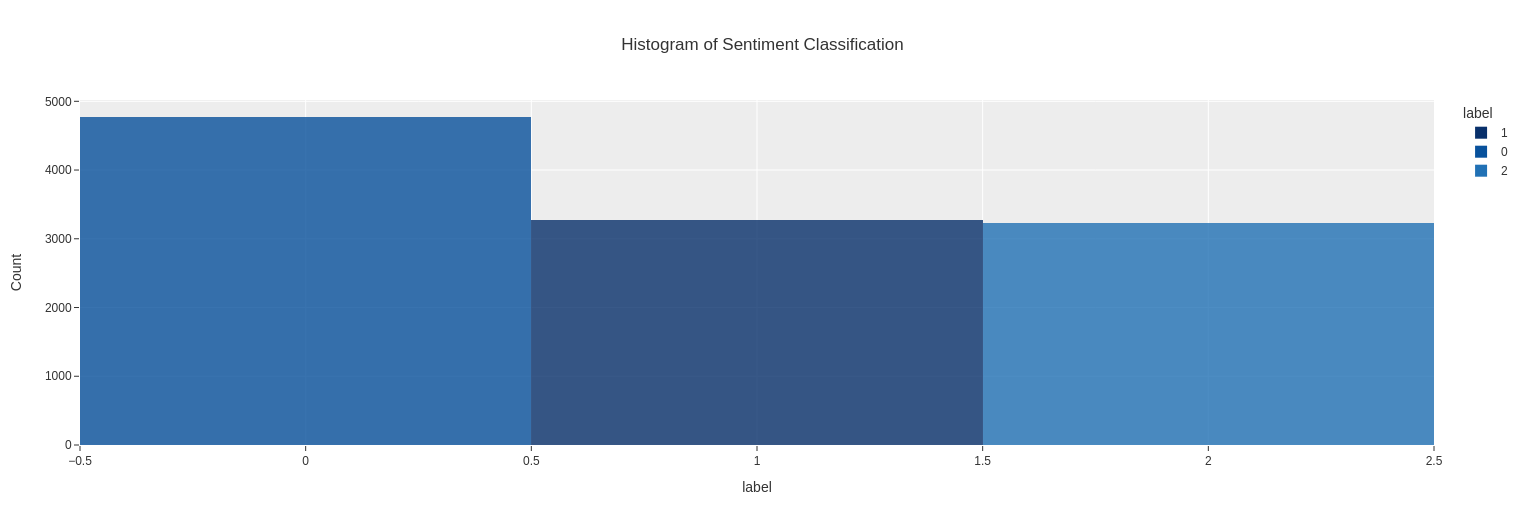

In [9]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

# count of ratings
fig = px.histogram(df,
             x = 'label',
             title = 'Histogram of Sentiment Classification',
             template = 'ggplot2',
             color = 'label',
             color_discrete_sequence= px.colors.sequential.Blues_r,
             opacity = 0.8,
             height = 525,
             width = 835,
            )

fig.update_yaxes(title='Count')
fig.show()

In [10]:
# encode label and mapping label name
#df["label"] = df["label"].apply(lambda x: label_encode(x))
df["label_name"] = df["label"].apply(lambda x: label2name(x))

In [11]:
# clean text, lowercase and remove punk
df["text"] = df["text"].apply(lambda x: preprocess_tweet(x, demoji=False))

In [12]:
df.head()

text  label label_name
0    Oe Chacal      1    Neutral
1    Anda vete      0   Negative
2   a la firme      1    Neutral
3   Chau, cojo      0   Negative
4  Tengo plata      1    Neutral

In [13]:
df.sample(n = 30)

text  label label_name
924    El perro oteaba inútilmente incitado por Valencio      1    Neutral
816     Bajaron de las mulas, tratando de no hacer ruido      1    Neutral
2571   Colorao... Prueba el cevichaso de mero del res...      2   Positive
3834   Muy bien Gracias a Dios !! Beto Te queremos !!...      2   Positive
6870   Ahora los delicuentes son perseguidos política...      0   Negative
4901                         Creo que murió su batería 😔      1    Neutral
11028  Esta comentarista hdp ...como tratas de encont...      0   Negative
2027   Son los rojos q cada ves más en empoderan porq...      0   Negative
10009  Milet no hagas caso a ciertas personas que sol...      2   Positive
2831   Fabio Villegas busca donde venden una buena sa...      1    Neutral
9136   Cómo soy caluroso, q la cama solo le pongo sáb...      1    Neutral
4721   Este es más bruto... Cosas que necesita el  Pe...      0   Negative
3969   Se le cayo la careta a este vago una vez más. ...      0   Negative
7340                Esta loco este onnn, 💩 de persona...      0   Negative
10295  Te pasaste Gaston con esos anticuchos ganamos;...      2   Positive
9891   Ay nooo Pan con Relleno y Camote frito!! 😔 Y y...      2   Positive
10525  Adriana Cordero Velazco cuál pedimos cholita l...      2   Positive
9888   Se dan cuenta a quien muestra, a una pituca qu...      0   Negative
4815   Acabo de hacer una carapulcra al estilo mostri...      2   Positive
594         Ah, carajo, pendejito eres le dijo a Joaquín      0   Negative
5122   La ojos de tiburón intentan años enfriar a la ...      1    Neutral
3923   sabes Yida eres una trome te admiro mucho buen...      2   Positive
3334   Estás en la nada Manolito, Marcahuasi  dicen q...      1    Neutral
210                               Es terca como una mula      0   Negative
4267   Así andan las viejas no les dice nada no querí...      1    Neutral
3725   El video habla de libertad y democracias y sin...      0   Negative
2188   DE CUANDO ACÁ ESTE BETOFILO SE PELEA CON SU PR...      0   Negative
6654   Número 7️⃣ ya voy como 100 comentarios estoy a...      1    Neutral
2833   Siga adelante con su trabajo valiente fiscal P...      1    Neutral
213                              Estás atontado, hermano      0   Negative

In [14]:
#Visualizations

In [15]:
#Word Cloud

In [14]:
from wordcloud import WordCloud


In [15]:

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [16]:

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords = set(stopwords.words('spanish', 'english'))
stopwords.update([ "x", "xq","q","k","Jajajaa","perra","kieren","verga","jaja"])
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords = stopwords,
        max_words=200,
        max_font_size=40, 
        scale=1,
        random_state=1
).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/darkstar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


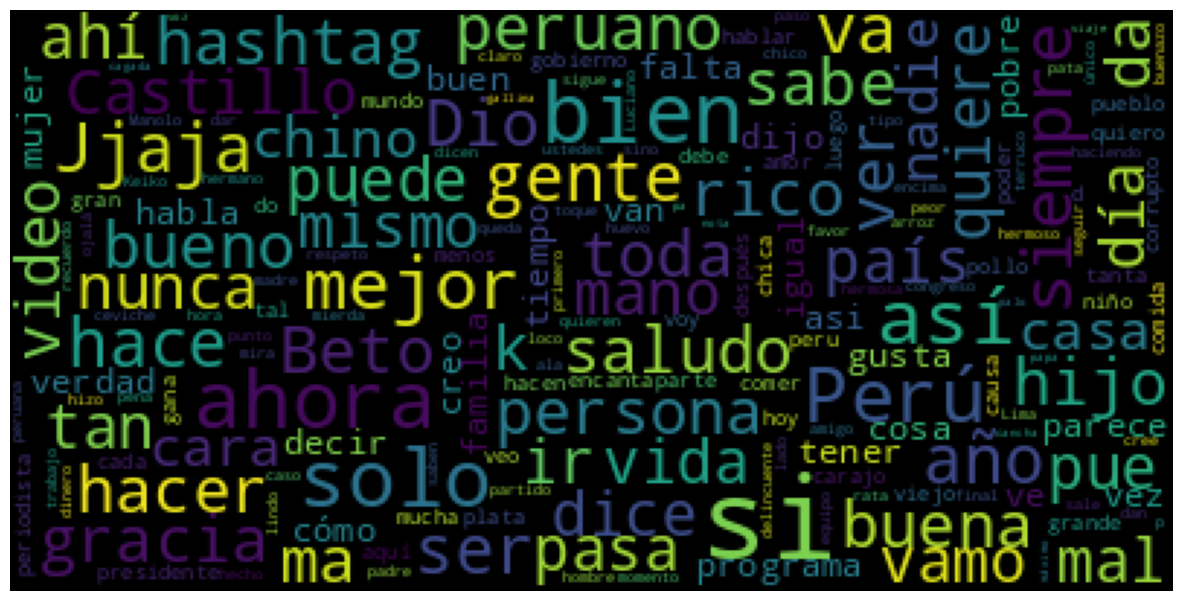

In [17]:
show_wordcloud(df["text"].values)

In [20]:
#Target Count

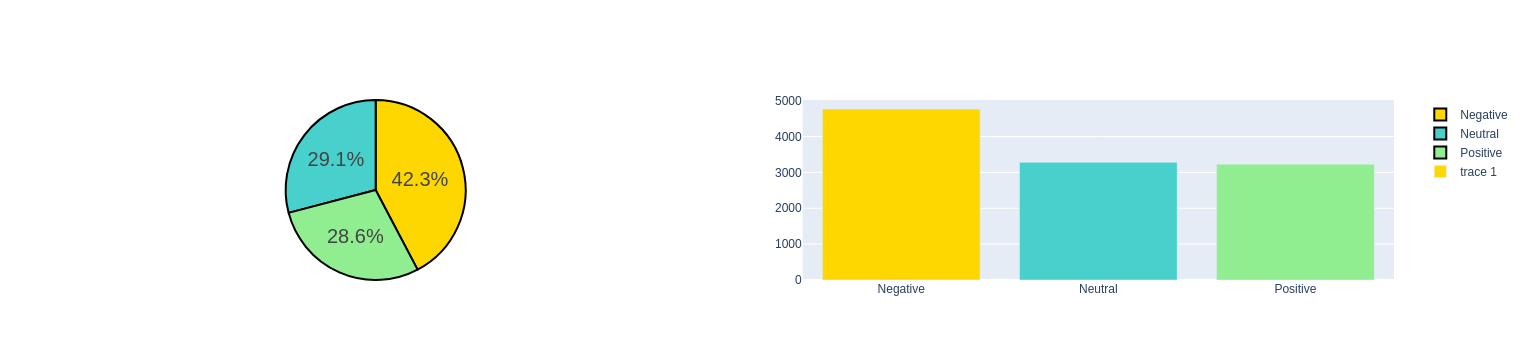

In [18]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]])
colors = ['gold', 'mediumturquoise', 'lightgreen'] # darkorange
fig.add_trace(go.Pie(labels=df.label_name.value_counts().index,
                             values=df.label.value_counts().values), 1, 1)

fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.add_trace(go.Bar(x=df.label_name.value_counts().index, y=df.label.value_counts().values, marker_color = colors), 1,2)

fig.show()

In [22]:
#Token Counts with simple tokenizer¶


In [19]:
# tokenize data
#df["tokenized_text"] = df.text.apply(lambda x: tokenize(x))
df["tokenized_text"] = df.text.apply(lambda x: preprocess_tweet(x, demoji=False))
# calculate token count for any sent
df["sent_token_length"] = df["tokenized_text"].apply(lambda x: len(x.split()))

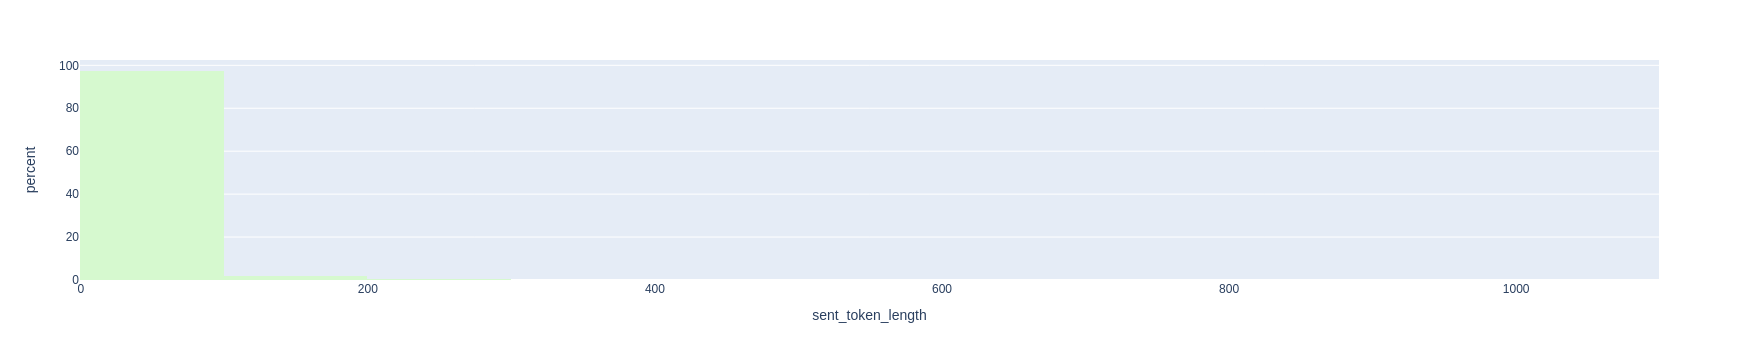

In [20]:
fig = px.histogram(df, x="sent_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [21]:
(df.sent_token_length < 200).mean()

0.9924618659098972

In [26]:
#Token Counts with roBERTuito tokenizer

In [22]:
from transformers import AutoTokenizer
model_name = "pysentimiento/robertuito-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [23]:
# data tokenize with bert tokenizer
df["sent_bert_token_length"] = df["text"].apply(lambda x: len(tokenizer(x, add_special_tokens=False)["input_ids"]))

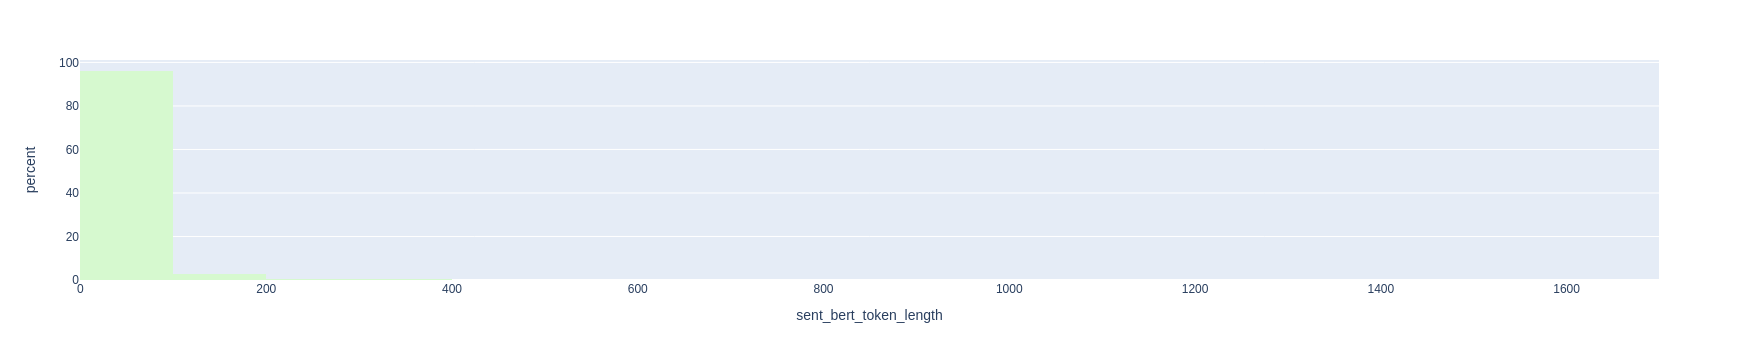

In [24]:
fig = px.histogram(df, x="sent_bert_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [25]:
# Less than 512 covers how many of the data
(df.sent_bert_token_length < 200).mean()

0.9898013479957432

In [31]:
#Characters Count in the Data

In [26]:

# valvulate char count for each review
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

import seaborn as sns
def plot_dist3(df, feature, title):
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 )
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))


    plt.suptitle(f'{title}', fontsize=24)

/tmp/ipykernel_7739/1990021368.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




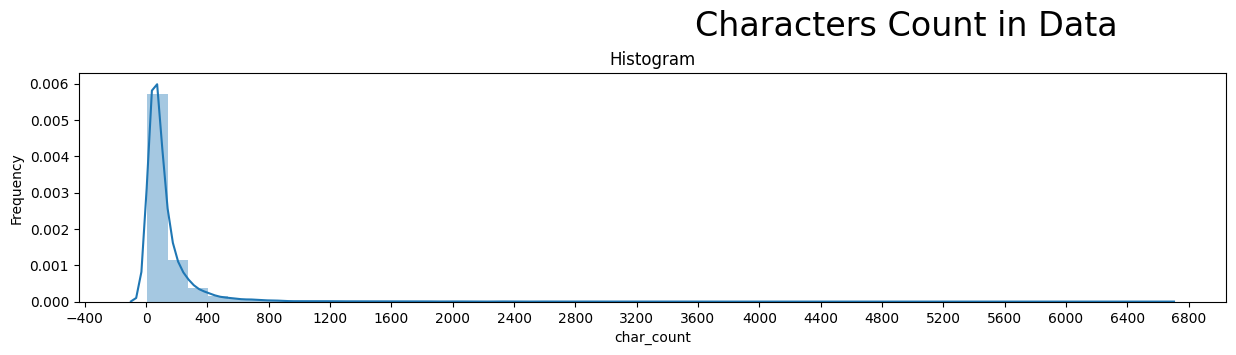

In [27]:
plot_dist3(df, 'char_count',
           'Characters Count in Data')

In [34]:
#Reviews Lengths

In [28]:
# Creating a new feature for the visualization.
df['Character Count'] = df['text'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(24, 12))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#e74c3c')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    plt.suptitle(f'{title}', fontsize=24)

/tmp/ipykernel_7739/3249694284.py:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_7739/3249694284.py:29: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




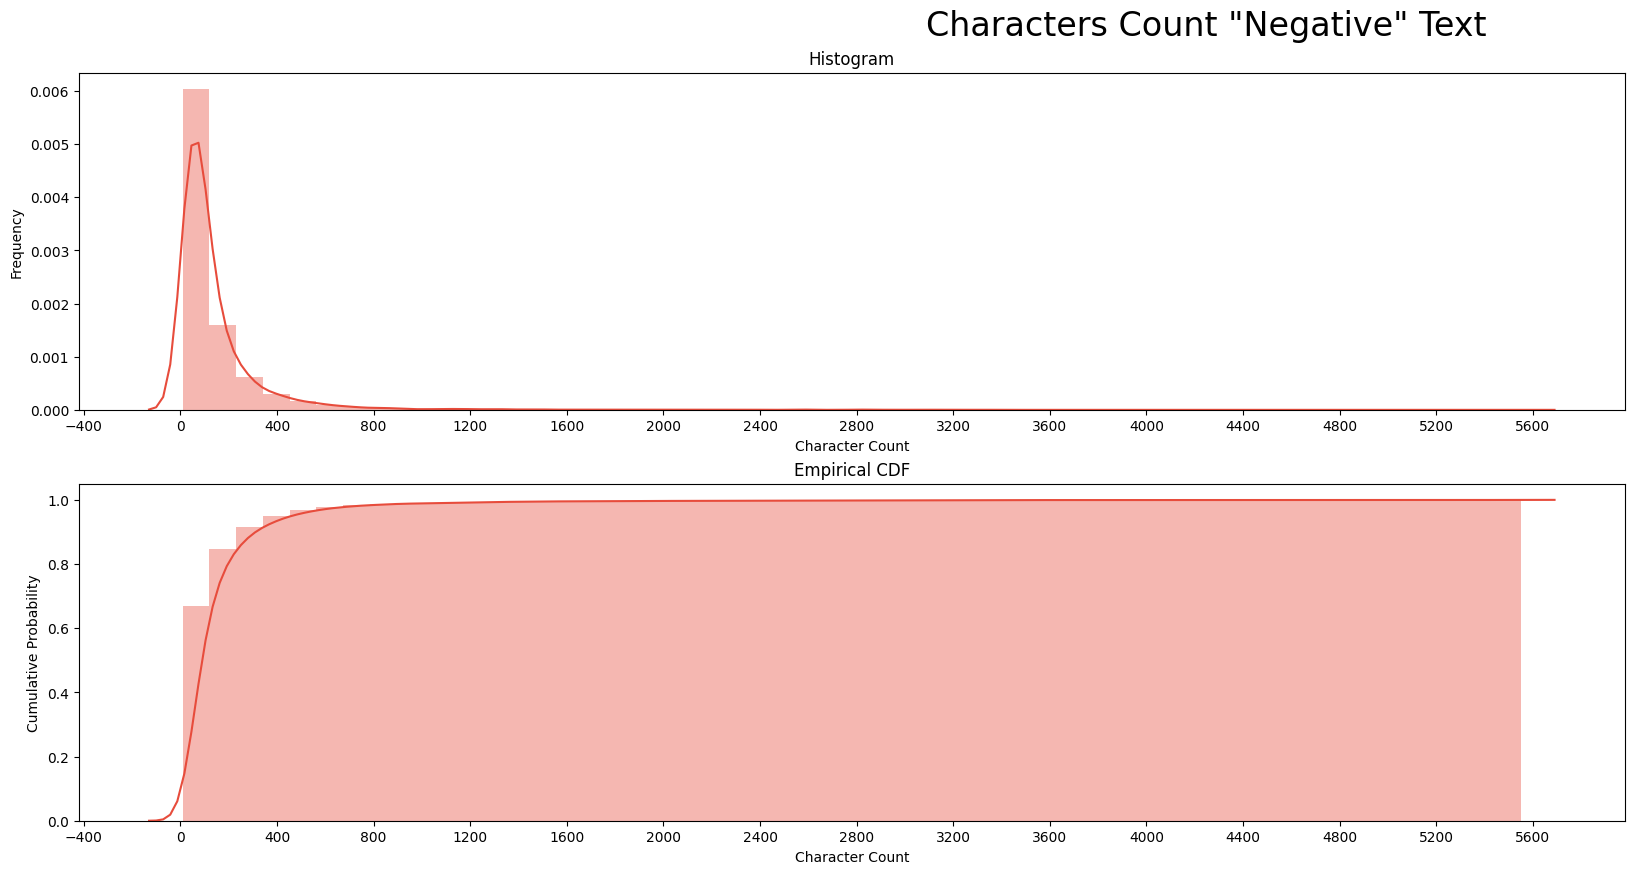

In [29]:
plot_dist3(df[df['label'] == 0], 'Character Count',
           'Characters Count "Negative" Text')

/tmp/ipykernel_7739/3249694284.py:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_7739/3249694284.py:29: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




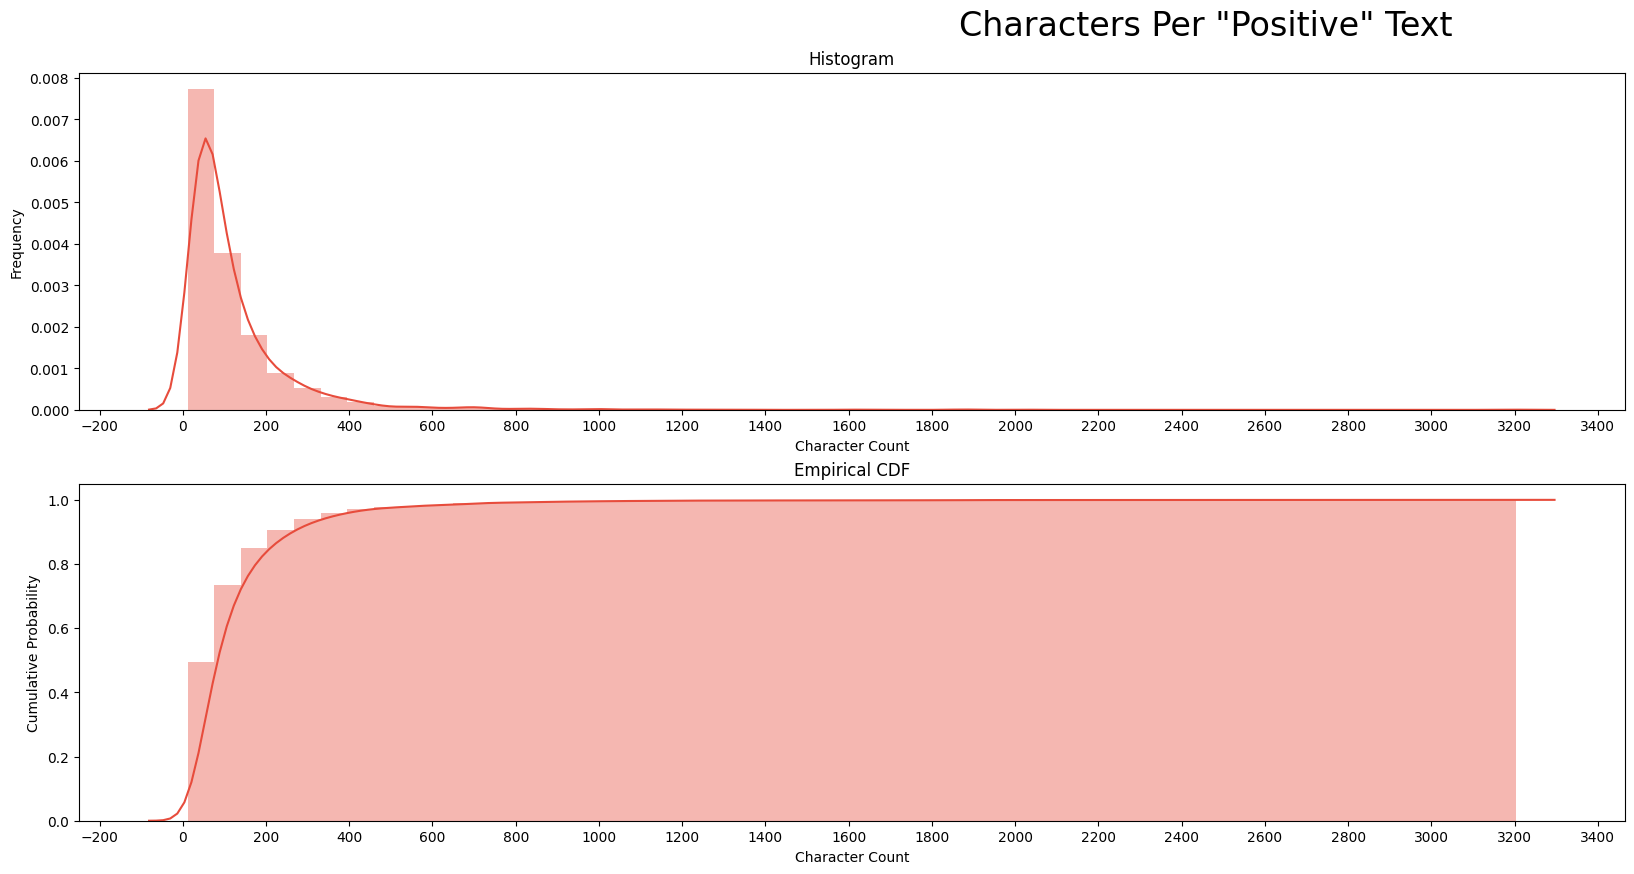

In [30]:
plot_dist3(df[df['label'] == 2], 'Character Count',
           'Characters Per "Positive" Text')

/tmp/ipykernel_7739/3249694284.py:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_7739/3249694284.py:29: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




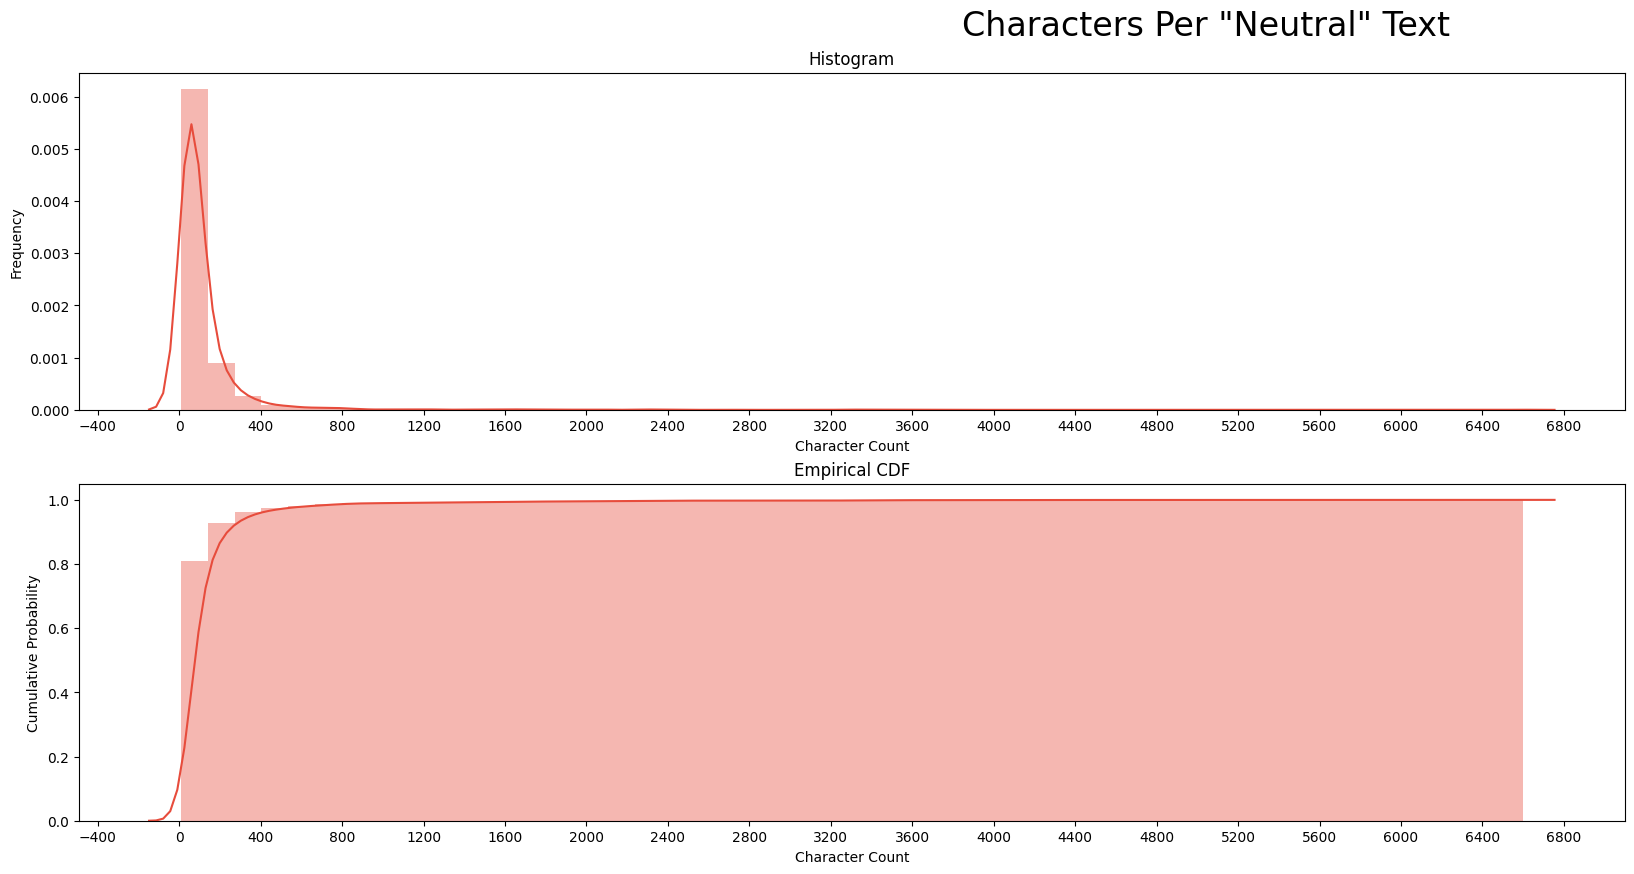

In [31]:
plot_dist3(df[df['label'] == 1], 'Character Count',
           'Characters Per "Neutral" Text')

In [39]:
#Word Counts

In [32]:
def plot_word_number_histogram(textno, textye, textz):
    
    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(18, 12), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')
    sns.distplot(textz.str.split().map(lambda x: len(x)), ax=axes[2], color='#e74c3c')

    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('negative')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('netrual')
    axes[2].set_xlabel('Word Count')
    axes[2].set_title('pozitive')
    
    fig.suptitle('Words Per Review', fontsize=24, va='baseline')
    
    fig.tight_layout()

/tmp/ipykernel_7739/1976843201.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_7739/1976843201.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_7739/1976843201.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to 

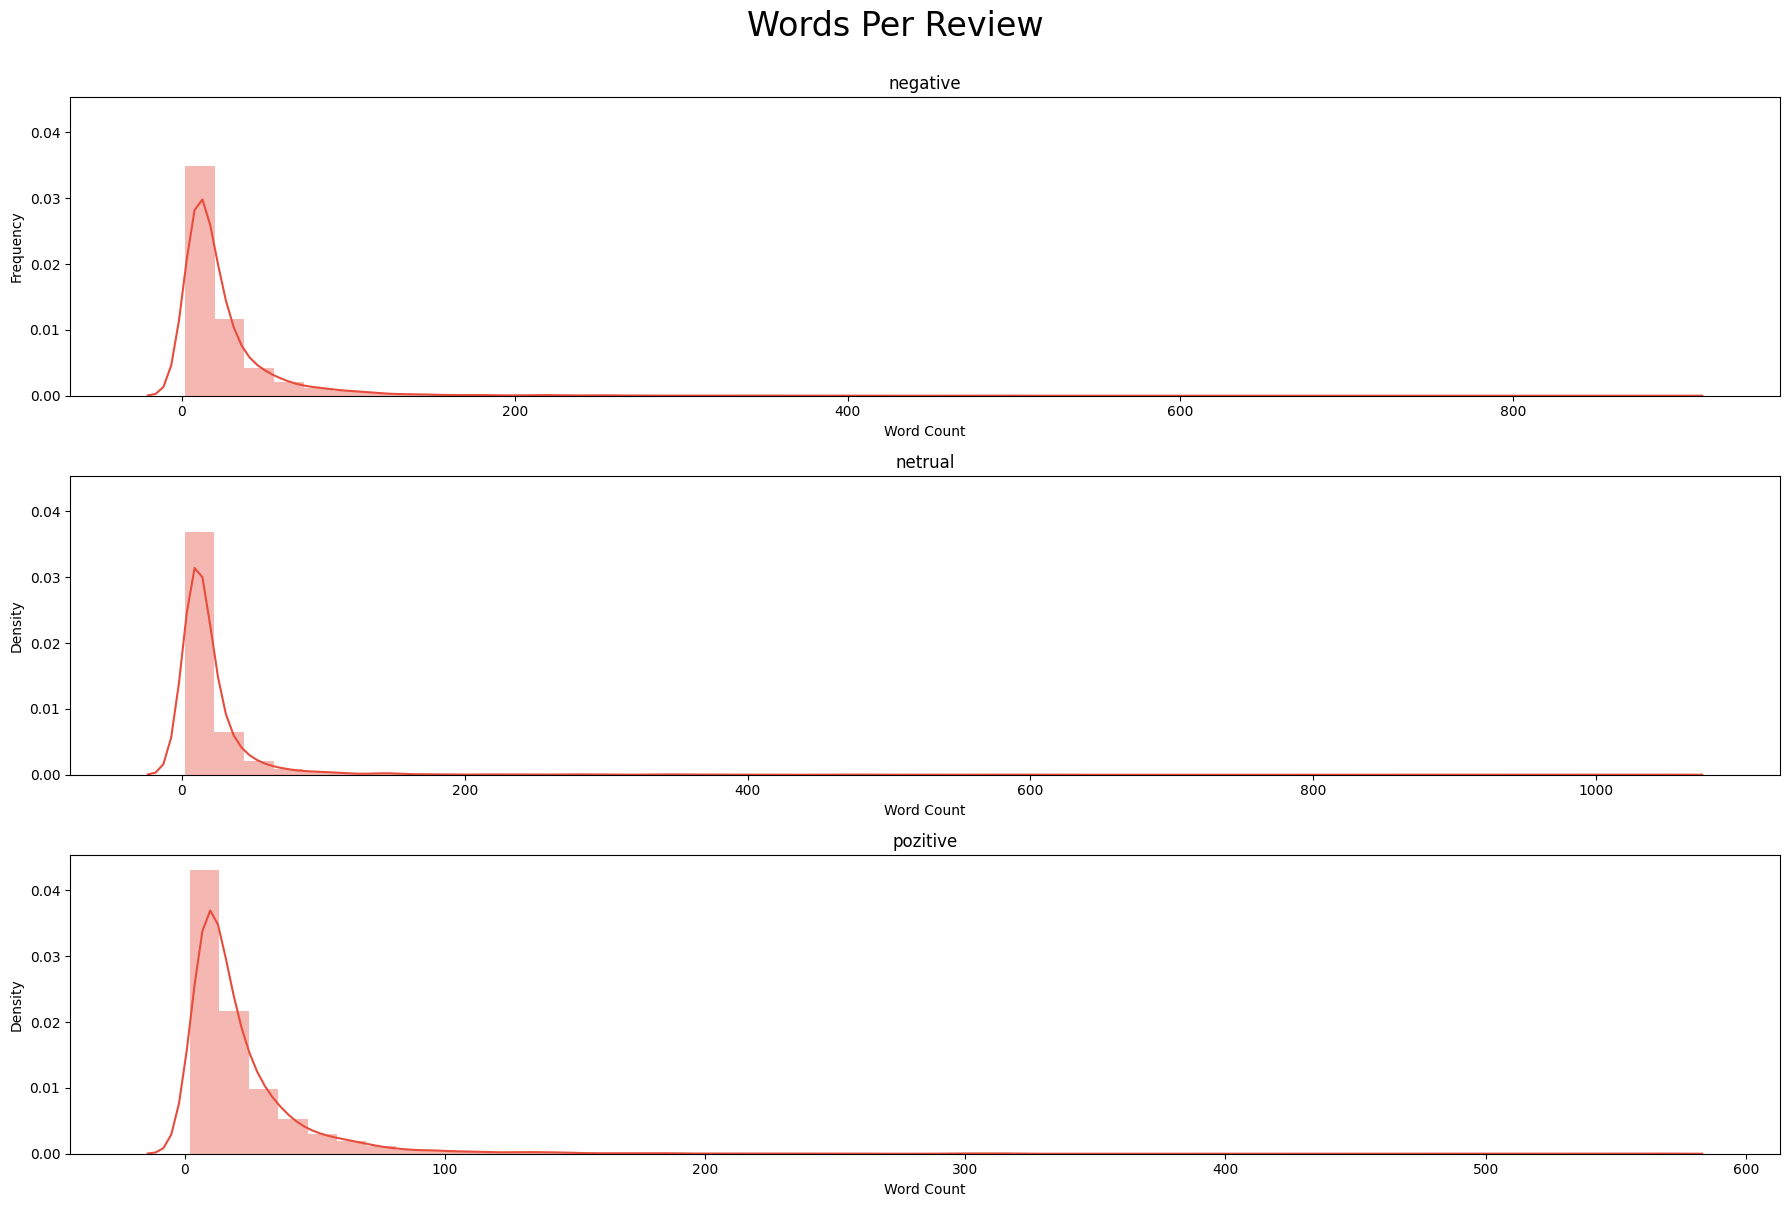

In [33]:
plot_word_number_histogram(df[df['label'] == 0]['text'],
                           df[df['label'] == 1]['text'],
                           df[df['label'] == 2]['text'],
                          )

In [34]:
# remove punk 
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: remove_punct(x))

In [55]:
df['tokenized_text'].sample(40)

4830                                                                                                                                                                                 A su comprare mi canchita 🤗
8765                                                                                                                                                                     Sayuri Shimabukuro tu arroz con pollo 🥺
10966                                                                                                                                               Katy mi moyo ️️ faltan ir a algunos points pero la hacemooos
11028    Esta comentarista hdp    como tratas de encontrarle las fallas donde no hay  nunca dijo eso hdp  tratas de dejarlo mal al presidente    le quieres encontrar cualquier minimo error   Eso se llama m...
4775                                                                                                                                               Diego Lazo Achata

In [48]:
pd.set_option("max_colwidth", 200)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/darkstar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


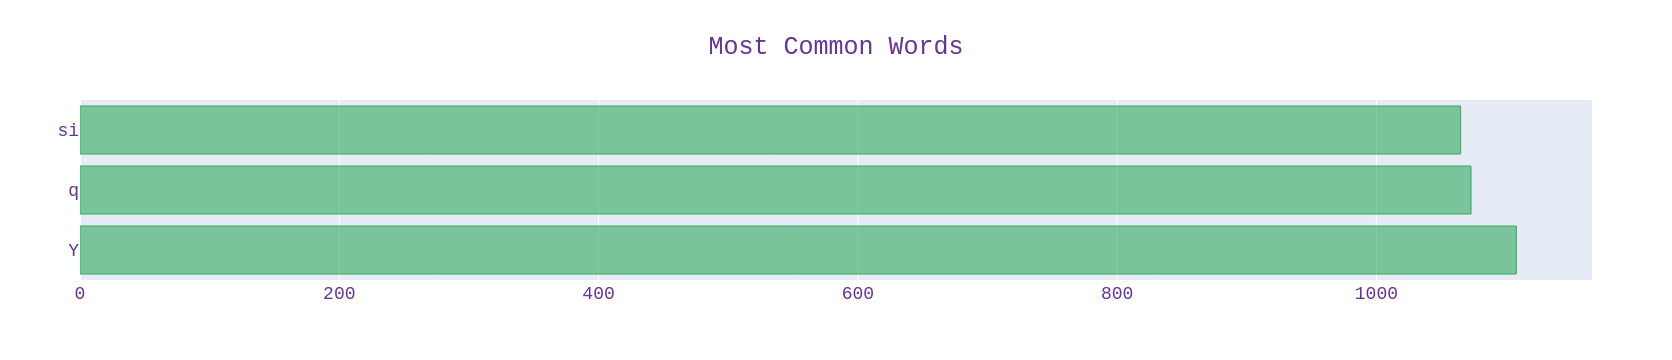

In [67]:
from collections import Counter, defaultdict

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('spanish'))
# stopWords_nltk.update([ "x", "xq","q","k","Jajajaa","perra","kieren","verga","jaja", 'si', 'Y'])

texts = df['tokenized_text']
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:30]:
    if word not in stopWords_nltk:
        x.append(word)
        y.append(count)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',  marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Most common Word',))

fig.update_layout( title={
        'text': "Most Common Words",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

fig.show()

In [45]:
#Most Common ngrams

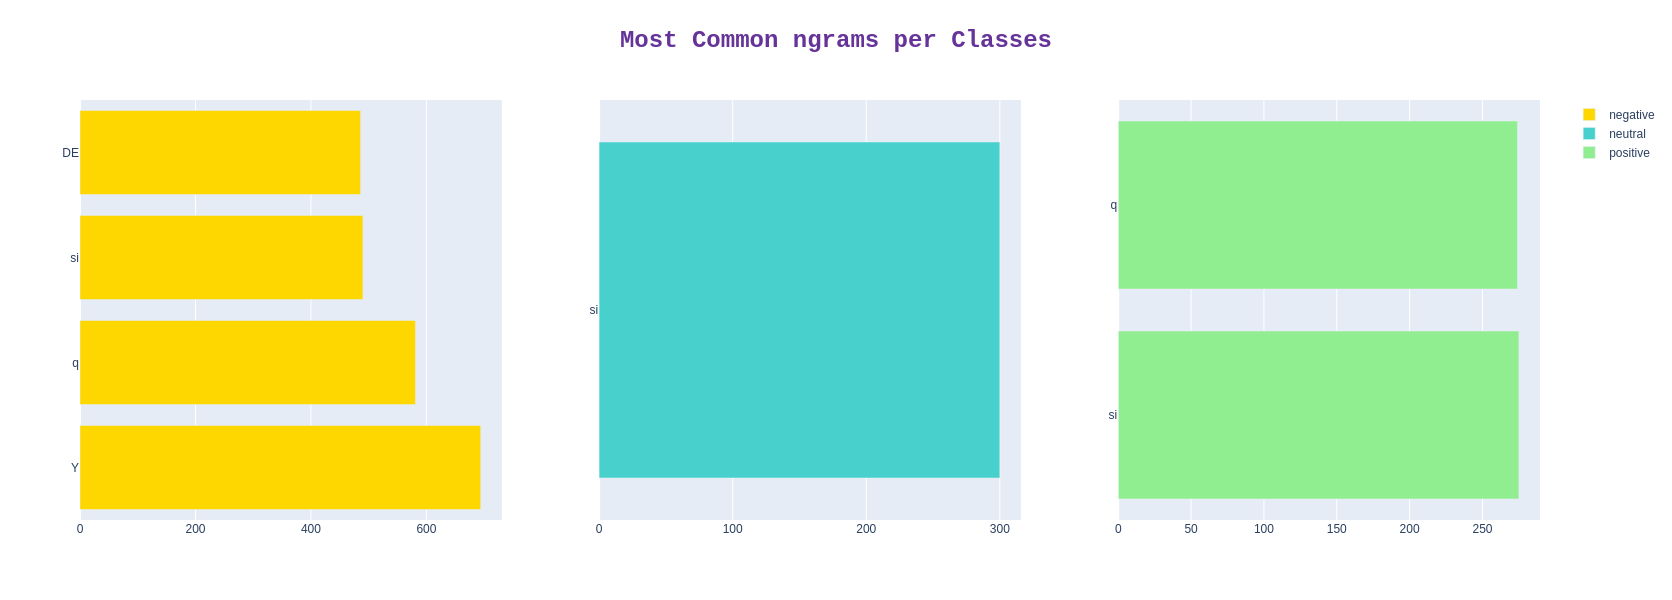

In [68]:
fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []

    for word, count in most[:30]:
        if word not in stopWords_nltk:
            x.append(word)
            y.append(count)

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    
fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common ngrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ),)


fig.show()

In [69]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:15]

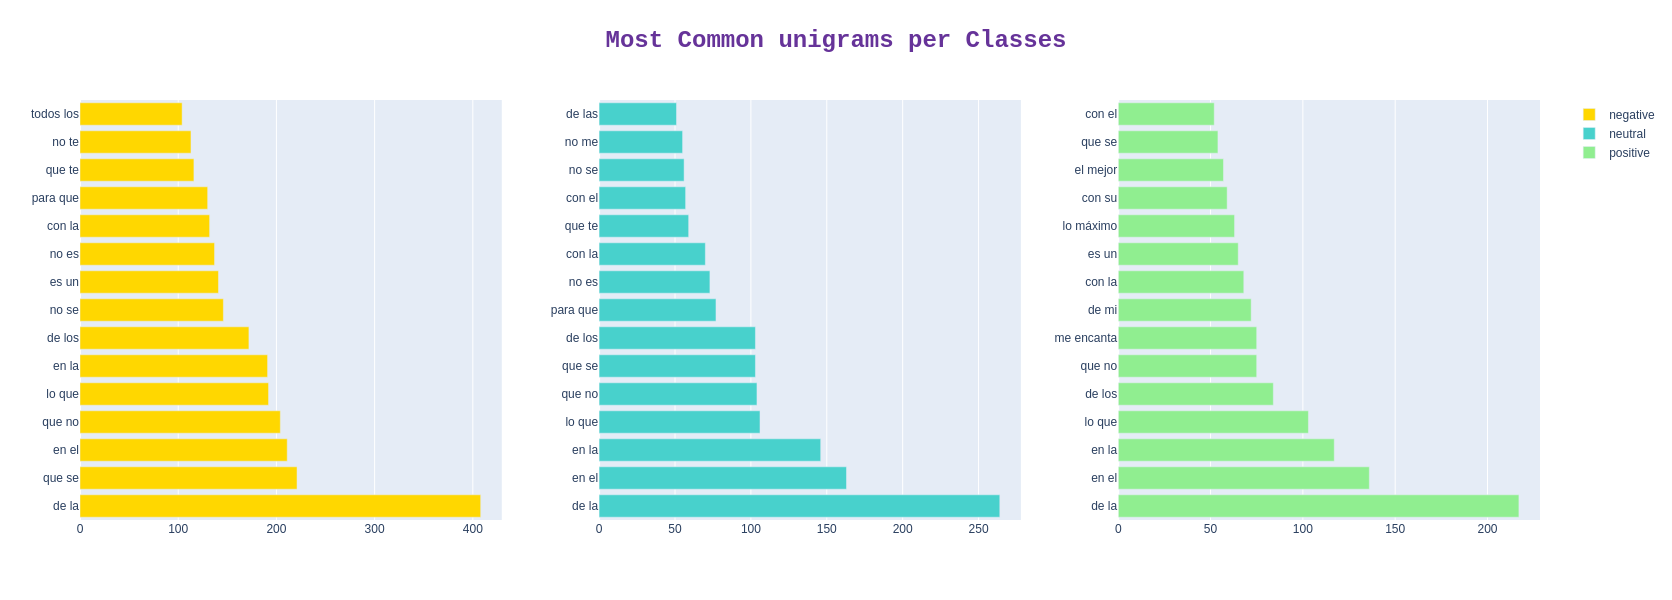

In [70]:
# unigram
fig = make_subplots(rows=1, cols=3)

title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common unigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))      
fig.show()

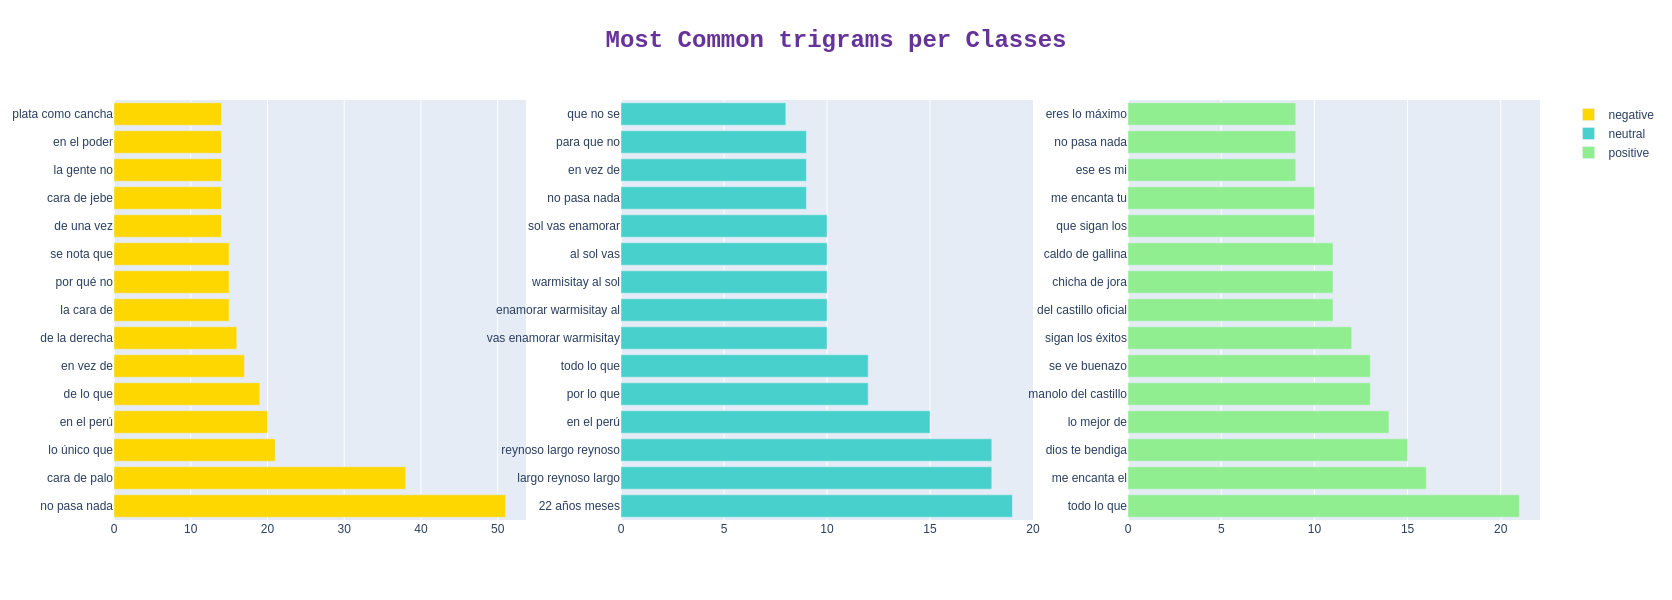

In [71]:
#trigram

fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    top_n_bigrams = _get_top_ngram(texts, 3)[:15]
    x, y = map(list, zip(*top_n_bigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1),

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common trigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))
    
fig.show()

In [72]:
#split train test
from sklearn.model_selection import train_test_split


random_state=1
train_df_, val_df = train_test_split(df, 
                                    test_size=0.10, 
                                    random_state=random_state, 
                            stratify=df.label.values)

In [73]:

train_df, test_df = train_test_split(train_df_, 
                                    test_size=0.10, 
                                    random_state=42, 
                            stratify=train_df_.label.values)

In [74]:
train_df.to_csv('data/train.csv', index=False)
val_df.to_csv('data/val.csv', index=False)
test_df.to_csv('data/test.csv', index=False)

In [75]:
!ls -l

total 6296
-rw-rw-r-- 1 darkstar darkstar   54914 Mar 17 01:26  01-build-datasets.ipynb
-rw-rw-r-- 1 darkstar darkstar 6203430 Mar 17 01:46  02-pilot-eda.ipynb
-rw-rw-r-- 1 darkstar darkstar   55432 Mar 17 01:26  03-pilot-train.ipynb
-rw-rw-r-- 1 darkstar darkstar   18628 Mar 17 01:26  04-pilot-train-bertuit.ipynb
-rw-rw-r-- 1 darkstar darkstar   43206 Mar 17 01:26  04-pilot-train-beto.ipynb
-rw-rw-r-- 1 darkstar darkstar   43122 Mar 17 01:26  04-pilot-train-maria.ipynb
drwxrwxr-x 3 darkstar darkstar    4096 Mar  3 16:37  data
-rw-rw-r-- 1 darkstar darkstar     618 Jan  9 21:00 'Emoticon filter.ipynb'
-rw-rw-r-- 1 darkstar darkstar    2137 Dec 14 00:37 'Example multiprocessing.ipynb'
drwxrwxr-x 6 darkstar darkstar    4096 Mar  3 17:34  test_trainer


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [76]:
len(train_df)

9133

In [77]:
len(test_df)

1015

In [78]:
len(val_df)

1128

In [93]:
df.sample(n = 30)

text  \
660                                                                                                                                                             A poco escuchóse el rumor de bestias al galope   
8438                                                                                                                                   Angélica Durand Hinostroza ya no te haran roche con tu gaseosa jaja 😂😂😂   
1026                                                                                                                                                            ¿Vamos a pelear por eso?   Qué fresco que eres   
1287                                                                                                                           hashtag paologuerrero  Pasa el Caño de es C0C4 P maniito 😎 no seas casa sola 😎😅   
10448                                                                                           Señor de los Milagros proteje a mi hermano Jaime,hija Cristina y Madre,hermanos te lo pido de todo corazón ️ 🙏   
5264                                                                                       Raymar Cecilia Moreno  debes de aprender  a decir  la última  mi amor  con tu voz debe  de escucharse hermoso 😏😏🤤🤤😈   
7373                                                                                                                                                                                     Nooo me hago pipí 😁😁😁   
4832                                           Yo tuve 4 cesareas y gracias a DIOS nacieron todos bien unidos en familia , duele pero por mis hijos aguante para sacar fuerza de donde sea y tengo mi CICATRIZ   
7426                                                                                                                                                                     Hola bobo jaja y después tal cual 🤣🤣🤣   
7202                                                                                                                                                                        Ese es mi ñaño JP Campos Garcia 🤭🤭   
9081   😡Ese periodista es COVARDE ,🧐 solo pega Mujeres ...👊ANTAURO  ENCAMBIO  ... ES  TODO UN PATRIOTA🇵🇪 ,que lamentablemente fue traicionado x su propio' Hermano .,OLLANTA. HUMALA (Pisao)..y.😠 DUELE ..A...   
10831                                                                                                                                                                       Jjaja el segundo está bacán!!! 💯 💯   
1392                                                                                                                                                                                Aplastado como cucaracha 😅   
10764                                                                                                                     Andate a la ctmre página de mierda ahora le haces el Cherry a la chismosa 😂🤢🤢🤢🤮🤮🤮🤢🤢🤢   
4829                                                                                                                                                       Sebastian Tineo Cieza aprende como hacer canchita🤣🤭   
10284                                                                                                                                                                          Máxima poetisa de Cholywood!! ️   
4812                                                                                                                                                           Le gusta  figuretiar, modos operandi, mafia K 🐀   
2467   Me paso lo mismo en un centro de rehabilitación hubo una doctora que simplemente me dijo así de frente sabes que tu niño es un niño con retardo mental y no todos mejoran y tanta cosas negativas qu...   
8702                                                                                                            El yogurt de frutos secos que lleva? El tío: Frutos secos pues!...  Que pendejo el tío!... 🤣🤣🤣   
67